# Preparatory file: Project (AppBioinfo2021)

This is a jupyter notebook to test different codes for the given project 'Are well-connected proteins more multi-faceted than others?' for the course 'Applied Bioinformatics 2021' (MedBioInfo).

In [22]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import networkx as nx

#print(nx.__version__)

import seaborn as sns

In [2]:
network_data_frame = pd.read_csv('project/data/9606.protein.links.v11.0.txt', sep=' ')
network_data_frame.head()

,protein1,protein2,combined_score
0,9606.ENSP00000000233,9606.ENSP00000272298,490
1,9606.ENSP00000000233,9606.ENSP00000253401,198
2,9606.ENSP00000000233,9606.ENSP00000401445,159
3,9606.ENSP00000000233,9606.ENSP00000418915,606
4,9606.ENSP00000000233,9606.ENSP00000327801,167


In [3]:
is_greater_than = network_data_frame["combined_score"]>=500
network_data_frame_filtered = network_data_frame[is_greater_than]
network_data_frame_filtered.head()

,protein1,protein2,combined_score
3,9606.ENSP00000000233,9606.ENSP00000418915,606
15,9606.ENSP00000000233,9606.ENSP00000432568,909
16,9606.ENSP00000000233,9606.ENSP00000427900,910
24,9606.ENSP00000000233,9606.ENSP00000350199,751
35,9606.ENSP00000000233,9606.ENSP00000438085,614


In [4]:
network_data_frame_filtered=network_data_frame_filtered.replace('9606.', '', regex=True)

In [5]:
network = nx.from_pandas_edgelist(network_data_frame_filtered, source = "protein1", target = "protein2")

In [6]:
network.degree

DegreeView({'ENSP00000000233': 154, 'ENSP00000418915': 343, 'ENSP00000432568': 186, 'ENSP00000427900': 95, 'ENSP00000350199': 139, 'ENSP00000438085': 86, 'ENSP00000482835': 247, 'ENSP00000354878': 102, 'ENSP00000405926': 175, 'ENSP00000314615': 164, 'ENSP00000349588': 162, 'ENSP00000326031': 309, 'ENSP00000414982': 150, 'ENSP00000480707': 164, 'ENSP00000324020': 262, 'ENSP00000300087': 170, 'ENSP00000268919': 223, 'ENSP00000384164': 90, 'ENSP00000388878': 97, 'ENSP00000258739': 181, 'ENSP00000310226': 285, 'ENSP00000346762': 118, 'ENSP00000303145': 241, 'ENSP00000364864': 167, 'ENSP00000404190': 287, 'ENSP00000263373': 128, 'ENSP00000359000': 150, 'ENSP00000380308': 405, 'ENSP00000380432': 1082, 'ENSP00000297044': 44, 'ENSP00000401010': 228, 'ENSP00000262305': 77, 'ENSP00000369755': 29, 'ENSP00000324287': 18, 'ENSP00000264712': 157, 'ENSP00000379712': 31, 'ENSP00000273130': 301, 'ENSP00000354560': 175, 'ENSP00000357048': 210, 'ENSP00000377233': 67, 'ENSP00000223369': 228, 'ENSP00000249

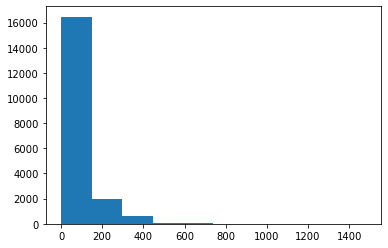

71.75650266374177

In [7]:
degree_list = [d for n, d in network.degree]
plt.hist(degree_list)
plt.show()

np.mean(degree_list)

In [24]:
degree_list_greater=[]
degree_list_lesser=[]
for n,d in network.degree:
    if d>100:
        #degree_list_greater[n]+=d
        degree_list_greater.append(n)
    else:
        #degree_list_lesser[n]+=d
        degree_list_lesser.append(n)

4162

In [36]:
#degree_node = {'node degrees >100':[len(degree_list_greater)], 'node degrees <=100':[len(degree_list_lesser)]}
#degree_node_df=pd.DataFrame(degree_node)

In [61]:
protein_domains=pd.read_csv('project/data/proteins_w_domains.txt', sep='\t')
protein_domains.head()

,Pfam ID,Protein stable ID
0,PF00146,ENSP00000354687
1,PF00361,ENSP00000355046
2,PF06444,ENSP00000355046
3,PF00115,ENSP00000354499
4,PF00116,ENSP00000354876


In [68]:
degree_list_greater_dataframe=pd.DataFrame(degree_list_greater, columns=['ENSEMBL_id'])
degree_list_greater_dataframe.head()

,ENSEMBL_id
0,ENSP00000000233
1,ENSP00000418915
2,ENSP00000432568
3,ENSP00000350199
4,ENSP00000482835


In [88]:
degree_list_lesser_dataframe=pd.DataFrame(degree_list_lesser, columns=['ENSEMBL_id'])
degree_list_lesser_dataframe.head()

,ENSEMBL_id
0,ENSP00000427900
1,ENSP00000438085
2,ENSP00000384164
3,ENSP00000388878
4,ENSP00000297044


In [87]:
#combined_greater=pd.concat([protein_domains, degree_list_greater_dataframe])
#combined_greater
#len(combined_greater["Pfam ID"].notnull())
#len(combined_greater["ENSEMBL_id"].notnull())

combined_greater = protein_domains[protein_domains['Protein stable ID'].isin(degree_list_greater_dataframe['ENSEMBL_id'])]
combined_greater

,Pfam ID,Protein stable ID
0,PF00146,ENSP00000354687
3,PF00115,ENSP00000354499
4,PF00116,ENSP00000354876
5,PF02790,ENSP00000354876
7,PF00119,ENSP00000354632
...,...,...
191391,PF13281,ENSP00000351908
191408,PF07686,ENSP00000376544
191422,PF00103,ENSP00000312673
191898,PF07686,ENSP00000478289


In [89]:
combined_lesser = protein_domains[protein_domains['Protein stable ID'].isin(degree_list_lesser_dataframe['ENSEMBL_id'])]
combined_lesser

,Pfam ID,Protein stable ID
1,PF00361,ENSP00000355046
2,PF06444,ENSP00000355046
6,PF00895,ENSP00000355265
8,PF00510,ENSP00000354982
10,PF00420,ENSP00000354728
...,...,...
192119,PF07686,ENSP00000479119
192125,PF07324,ENSP00000482514
192174,PF13853,ENSP00000480318
192690,NaN,ENSP00000347211


In [93]:
degree_node = {'node degrees >100':[len(degree_list_greater_dataframe)], 'node degrees <=100':[len(degree_list_lesser_dataframe)]}
degree_node_df=pd.DataFrame(degree_node)
degree_node_df.head()

,node degrees >100,node degrees <=100
0,4162,14984


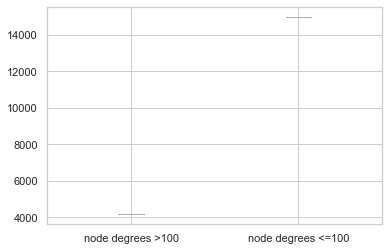

In [102]:
boxplot=degree_node_df.boxplot(column=['node degrees >100','node degrees <=100'])
plt.savefig("./project/protein_domains_vs_string_degree.png")